Question 1.
This code determines how quickly Python loads certain modules, locates Conda environments, and displays the current Python version.  

It verifies the installation of essential libraries like pandas and numpy and displays the cumulative time.

In [255]:
# CODE_CELL01 Environment
import subprocess
import pkg_resources
import time
import sys
import os 
#import times
start_total = time.time()
start = time.time()
print(f"sys import time: {time.time() - start:.3f}s")
currentenv = os.environ.get("CONDA_DEFAULT_ENV")
print("Environment name ",currentenv)
start = time.time()

import subprocess
print(f"subprocess import time: {time.time() - start:.3f}s")

start = time.time()
import pkg_resources
print(f"pkg_resources import time: {time.time() - start:.3f}s")

#conda environment query
start = time.time()
try:
    env_name = subprocess.check_output(['conda', 'info', '--envs']).decode()
    print(f"Conda env query time: {time.time() - start:.3f}s")
except Exception as e:
    print(f"Conda env query failed: {e}")

print("\nCurrent environment")
print(f"Python executable: {sys.executable}")

# Profile package check
start = time.time()
required_packages = [
    'pandas', 'numpy', 'scikit-learn', 'nltk',
    'keras', 'tensorflow', 'matplotlib', 'seaborn', 'wordcloud'
]
installed_packages = [pkg.project_name.lower() for pkg in pkg_resources.working_set]
print(f"Package check time: {time.time() - start:.3f}s")

print("\nPackages verification")
for package in required_packages:
    if package in installed_packages:
        print(f"✓ {package} - installed")
    else:
        print(f"✗ {package} - NOT installed")

print(f"\nTotal cell execution time: {time.time() - start_total:.3f}s")


sys import time: 0.000s
Environment name  intelligent_systems_exam_group_a
subprocess import time: 0.000s
pkg_resources import time: 0.000s
Conda env query time: 0.999s

Current environment
Python executable: /opt/anaconda3/envs/intelligent_systems_exam_group_a/bin/python
Package check time: 0.000s

Packages verification
✓ pandas - installed
✓ numpy - installed
✓ scikit-learn - installed
✓ nltk - installed
✗ keras - NOT installed
✗ tensorflow - NOT installed
✓ matplotlib - installed
✓ seaborn - installed
✗ wordcloud - NOT installed

Total cell execution time: 1.000s


Question 2
a.
- Fairness & Justice
AI must treat everyone the same. It should not like boys more than girls or favor rich people. Everyone should have a fair chance to get the job. If it does not, it is unfair.

- Accountability & Responsibility
Someone must be in charge of the AI. If it makes mistakes, a person should check and fix them. If no one cares and wrong decisions happen, people can get hurt and no one is responsible.

- Transparency & Explainability
AI must explain why it picks or rejects someone. People should understand its choices. If it rejects someone and gives no reason, it is confusing and unfair. Everyone should see how the AI decides.

- Emerging Ethical Rules
New rules help AI be fair and safe. Companies should check AI for mistakes or bias before using it. If AI is used without checking, it can hurt people and break ethical rules.

b.
A hiring dataset was generated, containing 1000 applicants, were randomly assigned and generated to simulate realistic information.

A preview of the first some rows is printed and the dataset is saved as hiring_data.csv.

In [256]:
# CODE_CELL02
import pandas as pd
import numpy as np

# generating hiring data
np.random.seed(42)
data = {
    'applicant_id': range(1000),
    'education_level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 1000, p=[0.3, 0.4, 0.25, 0.05]),
    'years_experience': np.random.randint(0, 20, 1000),
    'gender': np.random.choice(['Male', 'Female', 'Other'], 1000, p=[0.6, 0.35, 0.05]),
    'age': np.random.randint(22, 65, 1000),
    'previous_salary': np.random.normal(50000, 20000, 1000),
    'hired': np.random.choice([0, 1], 1000, p=[0.7, 0.3])
}
df = pd.DataFrame(data)
df.to_csv("hiring_data.csv", index=False)
print(df.head())
print("\n hiring_data.csv saved..")
df

   applicant_id education_level  years_experience  gender  age  \
0             0        Bachelor                14    Male   47   
1             1             PhD                11  Female   33   
2             2          Master                15    Male   32   
3             3        Bachelor                18  Female   58   
4             4     High School                 7    Male   46   

   previous_salary  hired  
0     46785.251174      1  
1     70716.946097      0  
2     49184.883003      0  
3     53784.639598      0  
4     30073.166357      0  

 hiring_data.csv saved..


,applicant_id,education_level,years_experience,gender,age,previous_salary,hired
0,0,Bachelor,14,Male,47,46785.251174,1
1,1,PhD,11,Female,33,70716.946097,0
2,2,Master,15,Male,32,49184.883003,0
3,3,Bachelor,18,Female,58,53784.639598,0
4,4,High School,7,Male,46,30073.166357,0
...,...,...,...,...,...,...,...
995,995,High School,7,Male,59,81598.802159,0
996,996,Master,16,Other,31,82840.484301,1
997,997,High School,14,Male,61,65072.485705,0
998,998,PhD,16,Other,45,45297.473349,0


```
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def show_distribution(column):
    """Show the distribution of a categorical column."""
    counts = df[column].value_counts(normalize=True) * 100
    print(f"Distribution of {column}:")
    print(counts.round(2))
    counts.plot(kind='bar', title=f"Distribution of {column}")
    plt.show()

def compare_groups(column, target="hired"):
    """Compare hiring rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Hiring rates by {column}:")
    print(rates.round(2))
    rates.plot(kind='bar', title=f"Hiring rates by {column}")
    plt.show()

def plot_histogram(column):
    """Plot histogram of a numerical variable."""
    plt.hist(df[column], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

def chi_square_test(feature, outcome="hired"):
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

def t_test_groups(feature, outcome="hired"):
    """T-test for comparing means of a numerical feature between hired vs not hired."""
    group1 = df[df[outcome] == 1][feature]
    group0 = df[df[outcome] == 0][feature]
    t_stat, p = ttest_ind(group1, group0, equal_var=False)
    print(f"T-test for {feature} by {outcome}")
    print(f"T-statistic = {t_stat:.2f}, p-value = {p:.4f}")
    return p

def correlation_check(feature, outcome="hired"):
    """Pearson correlation between a numerical feature and hiring outcome."""
    corr, p = pearsonr(df[feature], df[outcome])
    print(f"Correlation between {feature} and {outcome}")
    print(f"Correlation = {corr:.2f}, p-value = {p:.4f}")
    return corr, p
```

In [257]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def show_distribution(column):
    """Show the distribution of a categorical column."""
    counts = df[column].value_counts(normalize=True) * 100
    print(f"Distribution of {column}:")
    print(counts.round(2))
    counts.plot(kind='bar', title=f"Distribution of {column}")
    plt.show()

def compare_groups(column, target="hired"):
    """Compare hiring rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Hiring rates by {column}:")
    print(rates.round(2))
    rates.plot(kind='bar', title=f"Hiring rates by {column}")
    plt.show()

def plot_histogram(column):
    """Plot histogram of a numerical variable."""
    plt.hist(df[column], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


This code helps us check our job applicants.

1, show_distribution(column) shows how many people are in each group, like boys and girls, or education levels.

2, compare_groups(column) shows what percent of each group got hired.

3, plot_histogram(column) makes a picture of numbers, like ages, so we can see who is older or younger.

Distribution of gender:
gender
Male      59.5
Female    34.9
Other      5.6
Name: proportion, dtype: float64


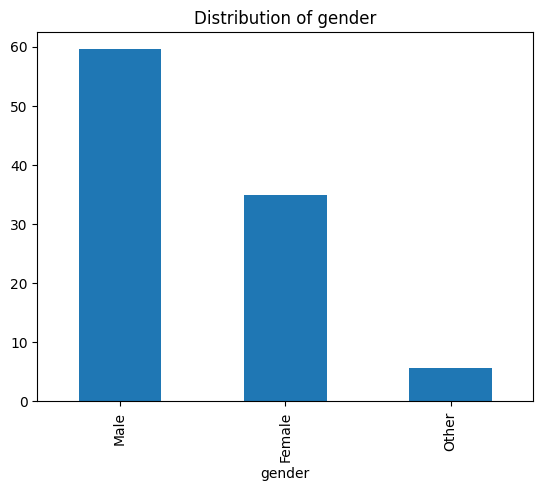

Hiring rates by gender:
gender
Female    0.26
Male      0.31
Other     0.23
Name: hired, dtype: float64


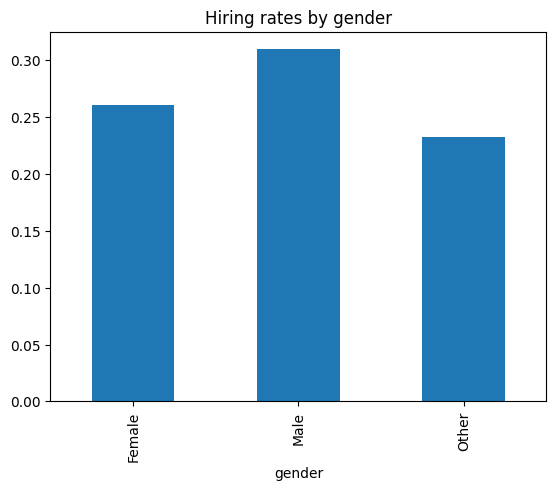

Distribution of education_level:
education_level
Bachelor       39.3
High School    31.9
Master         24.2
PhD             4.6
Name: proportion, dtype: float64


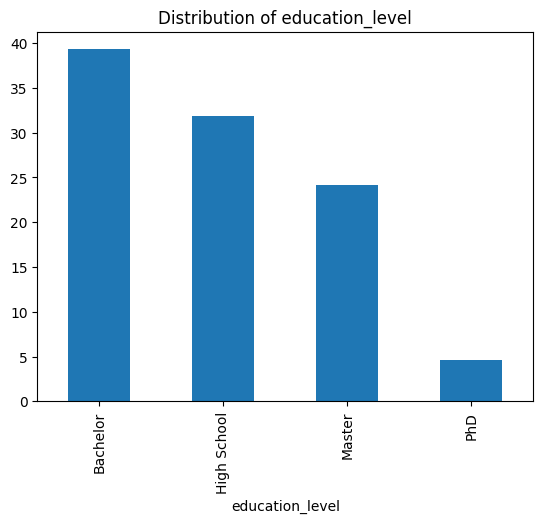

Hiring rates by education_level:
education_level
Bachelor       0.29
High School    0.30
Master         0.28
PhD            0.17
Name: hired, dtype: float64


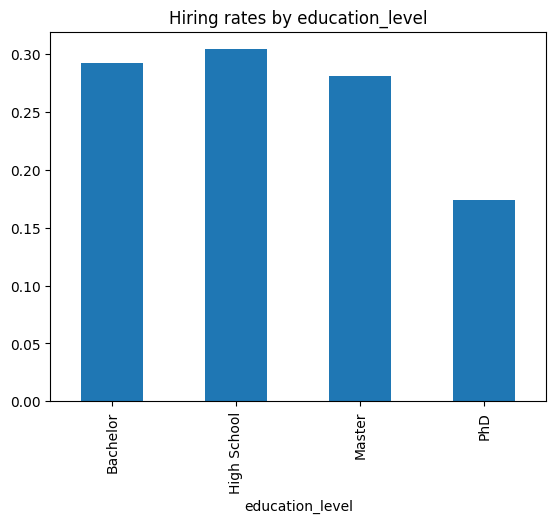

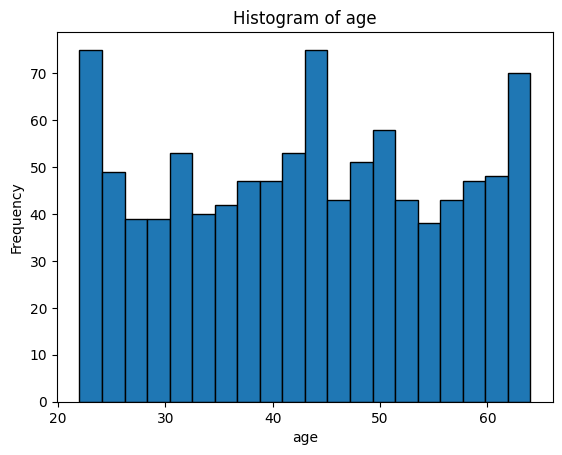

In [258]:
# CODE_CELL03

# Example bias analysis
show_distribution("gender")
compare_groups("gender")
show_distribution("education_level")
compare_groups("education_level")
plot_histogram("age")


In [259]:
df.head()

,applicant_id,education_level,years_experience,gender,age,previous_salary,hired
0,0,Bachelor,14,Male,47,46785.251174,1
1,1,PhD,11,Female,33,70716.946097,0
2,2,Master,15,Male,32,49184.883003,0
3,3,Bachelor,18,Female,58,53784.639598,0
4,4,High School,7,Male,46,30073.166357,0


In [260]:
# CODE_CELL04
def chi_square_test(feature, outcome="hired"):
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

chi_square_test("gender", "hired")

Chi-square test between gender and hired
Chi2 statistic = 3.43, p-value = 0.1803


0.18033749897768153

MARKDOWN_CELL01

Why we use this test

We want to see if the computer is being fair when choosing who gets hired. People can be boys, girls, or others, and the AI decides if they get the job. The Chi-Square test looks at the numbers to see if gender affects hiring.

How to understand the result.The test gives a p-value, which is just a number that tells us if the difference in hiring is real or just by chance.

If the p-value is small(p < 0.05), it might mean the AI is being unfair to some genders.

If the p-value is big (p > 0.05), it means the AI is probably fair, and gender does not change who gets hired.










MARKDOWN CELL02

Long-term societal implications of AI hiring systems

AI can help companies choose people for jobs faster and easier. It can look at many applications quickly and find people who might be good for a job. This is helpful because it saves time and can make hiring more organized.

But AI can also cause problems if it is not fair. If it favors boys more than girls, or certain people because of their age, background, or education, some people might not get jobs even if they are good at the work. Over time, this can make life harder for some groups and create unfairness in society.

People might also trust AI too much and stop checking decisions. If mistakes happen, no one may notice, and this can make people lose trust in AI. On the other hand, if AI is fair and tested carefully, it can help companies find the right people faster and make hiring more efficient.

To make AI safe and fair for everyone, we need to check it often, make sure it treats everyone equally, and explain its decisions clearly. If we do not do this, AI could create unfairness in the long run.

MARKDOWN_CELL03

Stakeholder responsibilities and accountability measures

Many people must take care of AI that chooses people for jobs. Companies must check the AI often to make sure it is fair and does not favor some people over others. The people who make the AI need to write it carefully and test it many times. They should make sure it does not make mistakes or treat anyone unfairly.

Managers and HR at the company also have a job. They need to watch the AI and fix any mistakes it makes. If someone is treated unfairly, they must correct it quickly. Workers and job applicants should also know how the AI works. This helps them understand why the AI picked someone or rejected someone.

Governments can help too. They can make rules to keep AI safe, fair, and responsible. Everyone must work together – the people who make AI, the companies, the managers, and the governments. By doing this, AI hiring can be fair and clear, and it will not hurt anyone. This way, everyone has a fair chance to get a job and life becomes more equal.

In [261]:
# CODE_CELL05

feedback_data = [
    "The delivery was TERRIBLE!!! My order #12345 arrived 3 days late. I'm so disappointed with the seller.",
    "Great product! Really happy with my purchase from this particular seller. Order #67890 was perfect.",
    "J'adore ce vendeur! Mon colis #55667 est arrivé plus tôt que prévu et en parfait état.",
    "Customer service at eBay was unhelpful. My iPhone 14 Pro has issues. I cannot believe they won't help me.",
    "මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ නෑ. දේවල් කිහිපයක් අඩුයි.",
    "LOVE this new MacBook Pro!!! Order delivered to 123 Main St on time. 5 stars!",
    "Die Lieferung war viel zu spät. Bestellung #77889 kam nach zwei Wochen an. Sehr enttäuschend.",
    "The USB cable I ordered was damaged. Never ordering again!",
    "எனது order #44556 நேரத்தில் கிடைத்தது. பொருளின் தரம் மிகச் சிறந்தது. நன்றி!",
    "My name is Leann, I ordered a new laptop from seller BestTech on 05/10/2023. The laptop is fantastic!",
    "我对这次购物非常不满意。订单 #66778 延迟了五天才送到。",
    "I received my order #54321, but the package was opened and some items were missing. Very unhappy with the service.",
    "الخدمة سيئة للغاية! طلبي #22445 لم يصل حتى الآن. أريد استرداد المبلغ فوراً.",
    "The headphones I bought are amazing! Thanks to the seller AudioWorld. Order #98765",
    "मेरा ऑर्डर #33990 समय पर आ गया और पैकिंग भी बहुत अच्छी थी। धन्यवाद!",
    "Worst experience ever! My order #11223 was lost in transit. I want a refund immediately. I'm Sandrie",
    "注文 #11298 は予定通り届きました。商品の品質にもとても満足しています。"
    "El producto llegó roto y la caja estaba dañada. Pedido #33445. Muy mala experiencia.",
]

MARKDOWN_CELL04

```
import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm")

# ---------- Cleaning Functions ----------
def basic_clean(text_list):
    """Lowercase text and remove punctuation."""
    cleaned = [re.sub(r'[^\w\s]', '', t.lower()) for t in text_list]
    return cleaned

def remove_stopwords(text_list):
    """Remove common English stopwords."""
    from spacy.lang.en.stop_words import STOP_WORDS
    cleaned = []
    for t in text_list:
        tokens = [word for word in t.split() if word not in STOP_WORDS]
        cleaned.append(" ".join(tokens))
    return cleaned

def normalize_text(text_list):
    """Handle punctuation, case, and whitespace consistently."""
    cleaned = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', t)).strip().lower() for t in text_list]
    return cleaned

# ---------- Entity Extraction ----------
def extract_entities_spacy(text_list):
    """Extract named entities (organizations, products, locations, order numbers)."""
    entities = []
    for t in text_list:
        doc = nlp(t)
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
    return entities

def extract_numbers(text_list):
    """Extract numeric values (e.g., order IDs, numbers)."""
    numbers = []
    for t in text_list:
        nums = re.findall(r'\d+', t)
        numbers.append(nums)
    return numbers

def keyword_match(text_list, keywords):
    """Find keyword matches in text."""
    matches = []
    for t in text_list:
        found = [kw for kw in keywords if kw.lower() in t.lower()]
        matches.append(found)
    return matches

# ---------- Language Detection ----------
def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

def count_words(text_list):
    """Count words in each feedback."""
    return [len(t.split()) for t in text_list]

def char_length(text_list):
    """Return character length of each feedback."""
    return [len(t) for t in text_list]
    
```


In [262]:
# CODE_CELL05
import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm")

# ---------- Cleaning Functions ----------
def basic_clean(text_list):
    """Lowercase text and remove punctuation."""
    cleaned = [re.sub(r'[^\w\s]', '', t.lower()) for t in text_list]
    return cleaned

def remove_stopwords(text_list):
    """Remove common English stopwords."""
    from spacy.lang.en.stop_words import STOP_WORDS
    cleaned = []
    for t in text_list:
        tokens = [word for word in t.split() if word not in STOP_WORDS]
        cleaned.append(" ".join(tokens))
    return cleaned

def normalize_text(text_list):
    """Handle punctuation, case, and whitespace consistently."""
    cleaned = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', t)).strip().lower() for t in text_list]
    return cleaned

# ---------- Entity Extraction ----------
def extract_entities_spacy(text_list):
    """Extract named entities (organizations, products, locations, order numbers)."""
    entities = []
    for t in text_list:
        doc = nlp(t)
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
    return entities

def extract_numbers(text_list):
    """Extract numeric values (e.g., order IDs, numbers)."""
    numbers = []
    for t in text_list:
        nums = re.findall(r'\d+', t)
        numbers.append(nums)
    return numbers

def keyword_match(text_list, keywords):
    """Find keyword matches in text."""
    matches = []
    for t in text_list:
        found = [kw for kw in keywords if kw.lower() in t.lower()]
        matches.append(found)
    return matches

# ---------- Language Detection ----------
def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

def count_words(text_list):
    """Count words in each feedback."""
    return [len(t.split()) for t in text_list]

def char_length(text_list):
    """Return character length of each feedback."""
    return [len(t) for t in text_list]

cleaned_basic = basic_clean(feedback_data)

# Step 2: Normalize text (extra whitespace, punctuation, lowercase)
cleaned_normalized = normalize_text(cleaned_basic)

# Step 3: Remove stopwords
cleaned_no_stopwords = remove_stopwords(cleaned_normalized)

# Create a DataFrame for clarity
import pandas as pd

df_feedback = pd.DataFrame({
    "original": feedback_data,
    "cleaned_basic": cleaned_basic,
    "cleaned_normalized": cleaned_normalized,
    "cleaned_no_stopwords": cleaned_no_stopwords
})

df_feedback.head()

,original,cleaned_basic,cleaned_normalized,cleaned_no_stopwords
0,The delivery was TERRIBLE!!! My order #12345 a...,the delivery was terrible my order 12345 arriv...,the delivery was terrible my order 12345 arriv...,delivery terrible order 12345 arrived 3 days l...
1,Great product! Really happy with my purchase f...,great product really happy with my purchase fr...,great product really happy with my purchase fr...,great product happy purchase particular seller...
2,J'adore ce vendeur! Mon colis #55667 est arriv...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...
3,Customer service at eBay was unhelpful. My iPh...,customer service at ebay was unhelpful my ipho...,customer service at ebay was unhelpful my ipho...,customer service ebay unhelpful iphone 14 pro ...
4,මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ ...,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය


In [263]:
# CODE_CELL06

# Extract named entities 
entities_spacy = extract_entities_spacy(cleaned_normalized)

# Extract numeric information 
numbers = extract_numbers(cleaned_normalized)

df_feedback["entities"] = entities_spacy
df_feedback["numbers"] = numbers

df_feedback.head()

,original,cleaned_basic,cleaned_normalized,cleaned_no_stopwords,entities,numbers
0,The delivery was TERRIBLE!!! My order #12345 a...,the delivery was terrible my order 12345 arriv...,the delivery was terrible my order 12345 arriv...,delivery terrible order 12345 arrived 3 days l...,"[(12345, DATE), (3 days, DATE)]","[12345, 3]"
1,Great product! Really happy with my purchase f...,great product really happy with my purchase fr...,great product really happy with my purchase fr...,great product happy purchase particular seller...,"[(67890, DATE)]",[67890]
2,J'adore ce vendeur! Mon colis #55667 est arriv...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...,"[(jadore ce vendeur mon colis, PERSON)]",[55667]
3,Customer service at eBay was unhelpful. My iPh...,customer service at ebay was unhelpful my ipho...,customer service at ebay was unhelpful my ipho...,customer service ebay unhelpful iphone 14 pro ...,"[(14, CARDINAL)]",[14]
4,මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ ...,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,"[(99887, DATE)]",[99887]


In [264]:
# CODE_CELL07

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def safe_detect_language(text_list):
    langs = []
    for t in text_list:
        try:
            langs.append(detect(t))
        except:
            langs.append("unknown")
    return langs

df_feedback.head()

,original,cleaned_basic,cleaned_normalized,cleaned_no_stopwords,entities,numbers
0,The delivery was TERRIBLE!!! My order #12345 a...,the delivery was terrible my order 12345 arriv...,the delivery was terrible my order 12345 arriv...,delivery terrible order 12345 arrived 3 days l...,"[(12345, DATE), (3 days, DATE)]","[12345, 3]"
1,Great product! Really happy with my purchase f...,great product really happy with my purchase fr...,great product really happy with my purchase fr...,great product happy purchase particular seller...,"[(67890, DATE)]",[67890]
2,J'adore ce vendeur! Mon colis #55667 est arriv...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...,jadore ce vendeur mon colis 55667 est arrivé p...,"[(jadore ce vendeur mon colis, PERSON)]",[55667]
3,Customer service at eBay was unhelpful. My iPh...,customer service at ebay was unhelpful my ipho...,customer service at ebay was unhelpful my ipho...,customer service ebay unhelpful iphone 14 pro ...,"[(14, CARDINAL)]",[14]
4,මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ ...,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,මග order 99887 හ පකජ එක හඳන පමණය න දවල කහපයක අඩය,"[(99887, DATE)]",[99887]


### MARKDOWN_CELL05

**Preprocessing Feedback Data**

I cleaned the feedback data so the computer can understand it better. First, I removed extra punctuation like !, #, and . and made all letters small. This helps because "Good" and "good" are treated the same. Then, I fixed spaces and removed extra gaps between words. I also removed very common words like "the", "is", and "at" because they do not give special meaning.

Next, I extracted important information. I found names of companies, products, and places using a program called spaCy. I also found numbers like order IDs, because they help know which order someone is talking about. Finally, I checked the language of each feedback so the computer knows if it is English, French, Hindi, or another language.

MARKDOWN_CELL06
```
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

nltk.download("vader_lexicon", quiet=True)

# ---------- Baseline Keyword Sentiment ----------
def keyword_sentiment(text_list):
    """Simple keyword-based sentiment classification (baseline)."""
    positive_words = ["good", "great", "happy", "love", "fantastic", "amazing"]
    negative_words = ["terrible", "bad", "worst", "gross", "unhappy", "disappointed"]
    
    results = []
    for text in text_list:
        text_lower = text.lower()
        score = sum([1 for w in positive_words if w in text_lower]) - \
                sum([1 for w in negative_words if w in text_lower])
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

# ---------- Bag-of-Words Pipeline ----------
def bow_sentiment_pipeline(text_list):
    """Train/test Bag-of-Words + Logistic Regression sentiment classifier."""
    # Debugging note: since no labels are given, we simulate them for demonstration
    # (in real exams, students would be provided training labels separately).
    labels = np.random.choice([0, 1], size=len(text_list))  # 0=neg, 1=pos (simulated)
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print("=== Bag-of-Words Sentiment Analysis Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_pred

# ---------- Debugging Pipeline Steps ----------
def debug_pipeline_step(text_list, step="vectorizer"):
    """Inspect intermediate pipeline steps for debugging/interpretation."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "vectorizer":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample vocabulary:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("Sample row vector (first document):", X[0].toarray())
    else:
        print("Step not recognized. Options: 'vectorizer', 'matrix'.")

# ---------- Pretrained Models ----------
def pretrained_sentiment_vader(text_list):
    """Sentiment analysis using VADER (lexicon-based)."""
    sid = SentimentIntensityAnalyzer()
    results = []
    for text in text_list:
        score = sid.polarity_scores(text)["compound"]
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

def pretrained_sentiment_transformer(text_list):
    """Sentiment analysis using Hugging Face transformer model."""
    model = pipeline("sentiment-analysis")
    return model(text_list)

```


In [265]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import torch
from transformers import pipeline

nltk.download("vader_lexicon", quiet=True)

# Baseline Keyword Sentiment 
def keyword_sentiment(text_list):
    """Simple keyword-based sentiment classification (baseline)."""
    positive_words = ["good", "great", "happy", "love", "fantastic", "amazing"]
    negative_words = ["terrible", "bad", "worst", "gross", "unhappy", "disappointed"]
    
    results = []
    for text in text_list:
        text_lower = text.lower()
        score = sum([1 for w in positive_words if w in text_lower]) - \
                sum([1 for w in negative_words if w in text_lower])
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

# Bag-of-Words Pipeline 
def bow_sentiment_pipeline(text_list):
    """Train/test Bag-of-Words + Logistic Regression sentiment classifier."""
    # Debugging note: since no labels are given, we simulate them for demonstration
    # (in real exams, students would be provided training labels separately).
    labels = np.random.choice([0, 1], size=len(text_list))  # 0=neg, 1=pos (simulated)
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print("=== Bag-of-Words Sentiment Analysis Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_pred

# Debugging Pipeline Steps
def debug_pipeline_step(text_list, step="vectorizer"):
    """Inspect intermediate pipeline steps for debugging/interpretation."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "vectorizer":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample vocabulary:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("Sample row vector (first document):", X[0].toarray())
    else:
        print("Step not recognized. Options: 'vectorizer', 'matrix'.")

# Pretrained Models
def pretrained_sentiment_vader(text_list):
    """Sentiment analysis using VADER (lexicon-based)."""
    sid = SentimentIntensityAnalyzer()
    results = []
    for text in text_list:
        score = sid.polarity_scores(text)["compound"]
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

def pretrained_sentiment_transformer(text_list):
    """Sentiment analysis using Hugging Face transformer model."""
    model = pipeline("sentiment-analysis")
    return model(text_list)



In [266]:
# CODE_CELL08
pipe, X_test, y_pred = bow_sentiment_pipeline(feedback_data)

# Check predictions
print(keyword_sentiment(["I love this"]))  #positive feedback
print("----------------------------------")
print(keyword_sentiment(["I hate that"]))  #negative feedback

=== Bag-of-Words Sentiment Analysis Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6

          text predicted_sentiment
0  I love this            positive
----------------------------------
          text predicted_sentiment
0  I hate that            negative


/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [267]:
debug_pipeline_step(feedback_data, step="vectorizer")

# Display sample predictions
for text, pred in zip(X_test[:5], y_pred[:5]):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Feedback: {text}\nPredicted Sentiment: {sentiment}\n")

Vocabulary size: 187
Sample vocabulary: [('the', 123), ('delivery', 44), ('was', 138), ('terrible', 121), ('my', 86), ('order', 93), ('12345', 5), ('arrived', 25), ('days', 41), ('late', 73)]
Feedback: The delivery was TERRIBLE!!! My order #12345 arrived 3 days late. I'm so disappointed with the seller.
Predicted Sentiment: Positive

Feedback: Great product! Really happy with my purchase from this particular seller. Order #67890 was perfect.
Predicted Sentiment: Positive

Feedback: LOVE this new MacBook Pro!!! Order delivered to 123 Main St on time. 5 stars!
Predicted Sentiment: Positive

Feedback: Worst experience ever! My order #11223 was lost in transit. I want a refund immediately. I'm Sandrie
Predicted Sentiment: Positive

Feedback: I received my order #54321, but the package was opened and some items were missing. Very unhappy with the service.
Predicted Sentiment: Positive



In [268]:
# CODE_CELL09

# --- VADER Sentiment Analysis ---
print("=== VADER Sentiment Analysis Results ===")
vader_results = pretrained_sentiment_vader(feedback_data)
print(vader_results)

=== VADER Sentiment Analysis Results ===
                                                 text predicted_sentiment
0   The delivery was TERRIBLE!!! My order #12345 a...            negative
1   Great product! Really happy with my purchase f...            positive
2   J'adore ce vendeur! Mon colis #55667 est arriv...            negative
3   Customer service at eBay was unhelpful. My iPh...            negative
4   මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ ...            negative
5   LOVE this new MacBook Pro!!! Order delivered t...            positive
6   Die Lieferung war viel zu spät. Bestellung #77...            negative
7   The USB cable I ordered was damaged. Never ord...            negative
8   எனது order #44556 நேரத்தில் கிடைத்தது. பொருளின...            negative
9   My name is Leann, I ordered a new laptop from ...            positive
10                    我对这次购物非常不满意。订单 #66778 延迟了五天才送到。            negative
11  I received my order #54321, but the package wa...            negati

**MARKDOWN_CELL05.1**

Bag-of-Words Model

This model looks at how many times each word appears. It does not understand meaning, just counts words. It works okay when data is simple. But it cannot understand feelings like “not bad.” It is fast and easy, but not very smart. We need real labeled data to make it better for real use.

VADER Model

VADER is a smart rule book for words. It knows if a word sounds happy or sad. It is good for short English sentences like “I love it!” or “This is terrible!” It works fast and does not need training. But it only knows English and can get confused by tricky words or jokes. It is good for quick tests.

Hugging Face Model

The Hugging Face model is like a big brain trained on many sentences. It understands meaning and context better. It knows “not bad” means something good. It works for different topics and feelings. It gives the best results but is slower and needs more computer power. It is great for serious work with big text data.

MARKDOWN_CELL08
```

import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Rule-Based Classifier ----------
def rule_based_classifier(text_list):
    """Simple keyword-based classifier."""
    categories = []
    for text in text_list:
        t = text.lower()
        if "late" in t or "delivery" in t or "arrived" in t:
            categories.append("Delivery Issue")
        elif "broken" in t or "damaged" in t or "quality" in t or "problem" in t:
            categories.append("Product Issue")
        elif "service" in t or "support" in t or "help" in t:
            categories.append("Service Issue")
        elif "love" in t or "happy" in t or "great" in t or "fantastic" in t:
            categories.append("General Praise")
        else:
            categories.append("Product Issue")  # fallback
    return categories

# ---------- Bag-of-Words Classifier ----------
def bow_text_classifier(text_list, labels=None):
    """Bag-of-Words + Logistic Regression classifier (dummy labels if not given)."""
    if labels is None:
        # Simulate dummy labels for demonstration
        labels = np.random.choice(["Product Issue","Delivery Issue","Service Issue","General Praise"], size=len(text_list))
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("=== Bag-of-Words Classification Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_test, y_pred

# ---------- Debugging Step ----------
def debug_classifier_step(text_list, step="features"):
    """Inspect intermediate classifier steps."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "features":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample features:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("First row vector:", X[0].toarray())
    else:
        print("Step not recognised. Options: 'features', 'matrix'.")

# ---------- Evaluation Functions ----------
def evaluate_classifier(y_true, y_pred):
    """Compute precision, recall, F1-score."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))

def confusion_matrix_plot(y_true, y_pred):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

def baseline_accuracy(y_true, y_pred):
    """Report baseline accuracy vs. model accuracy."""
    majority_class = pd.Series(y_true).mode()[0]
    baseline = sum([y==majority_class for y in y_true]) / len(y_true)
    model_acc = accuracy_score(y_true, y_pred)
    print(f"Baseline Accuracy (majority class): {baseline:.2f}")
    print(f"Model Accuracy: {model_acc:.2f}")
```

In [269]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Rule-Based Classifier ----------
def rule_based_classifier(text_list):
    """Simple keyword-based classifier."""
    categories = []
    for text in text_list:
        t = text.lower()
        if "late" in t or "delivery" in t or "arrived" in t:
            categories.append("Delivery Issue")
        elif "broken" in t or "damaged" in t or "quality" in t or "problem" in t:
            categories.append("Product Issue")
        elif "service" in t or "support" in t or "help" in t:
            categories.append("Service Issue")
        elif "love" in t or "happy" in t or "great" in t or "fantastic" in t:
            categories.append("General Praise")
        else:
            categories.append("Product Issue")  # fallback
    return categories

# ---------- Bag-of-Words Classifier ----------
def bow_text_classifier(text_list, labels=None):
    """Bag-of-Words + Logistic Regression classifier (dummy labels if not given)."""
    if labels is None:
        # Simulate dummy labels for demonstration
        labels = np.random.choice(["Product Issue","Delivery Issue","Service Issue","General Praise"], size=len(text_list))
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("=== Bag-of-Words Classification Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_test, y_pred

# ---------- Debugging Step ----------
def debug_classifier_step(text_list, step="features"):
    """Inspect intermediate classifier steps."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "features":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample features:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("First row vector:", X[0].toarray())
    else:
        print("Step not recognised. Options: 'features', 'matrix'.")

# ---------- Evaluation Functions ----------
def evaluate_classifier(y_true, y_pred):
    """Compute precision, recall, F1-score."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))

def confusion_matrix_plot(y_true, y_pred):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

def baseline_accuracy(y_true, y_pred):
    """Report baseline accuracy vs. model accuracy."""
    majority_class = pd.Series(y_true).mode()[0]
    baseline = sum([y==majority_class for y in y_true]) / len(y_true)
    model_acc = accuracy_score(y_true, y_pred)
    print(f"Baseline Accuracy (majority class): {baseline:.2f}")
    print(f"Model Accuracy: {model_acc:.2f}")

In [270]:
# CODE_CELL10

# Rule-based classifier
rule_preds = rule_based_classifier(feedback_data)
print("=== Rule-Based Predictions ===")
for r, p in zip(feedback_data, rule_preds):
    print(f"{r} → {p}")

# Using Bag-of-Words classifier
model, X_test, y_test, y_pred = bow_text_classifier(feedback_data)


=== Rule-Based Predictions ===
The delivery was TERRIBLE!!! My order #12345 arrived 3 days late. I'm so disappointed with the seller. → Delivery Issue
Great product! Really happy with my purchase from this particular seller. Order #67890 was perfect. → General Praise
J'adore ce vendeur! Mon colis #55667 est arrivé plus tôt que prévu et en parfait état. → Product Issue
Customer service at eBay was unhelpful. My iPhone 14 Pro has issues. I cannot believe they won't help me. → Service Issue
මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ නෑ. දේවල් කිහිපයක් අඩුයි. → Product Issue
LOVE this new MacBook Pro!!! Order delivered to 123 Main St on time. 5 stars! → General Praise
Die Lieferung war viel zu spät. Bestellung #77889 kam nach zwei Wochen an. Sehr enttäuschend. → Product Issue
The USB cable I ordered was damaged. Never ordering again! → Product Issue
எனது order #44556 நேரத்தில் கிடைத்தது. பொருளின் தரம் மிகச் சிறந்தது. நன்றி! → Product Issue
My name is Leann, I ordered a new laptop from s

/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

=== Classification Report ===
                precision    recall  f1-score   support

Delivery Issue       0.40      0.67      0.50         3
General Praise       0.00      0.00      0.00         1
 Service Issue       0.00      0.00      0.00         2

      accuracy                           0.33         6
     macro avg       0.13      0.22      0.17         6
  weighted avg       0.20      0.33      0.25         6



/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

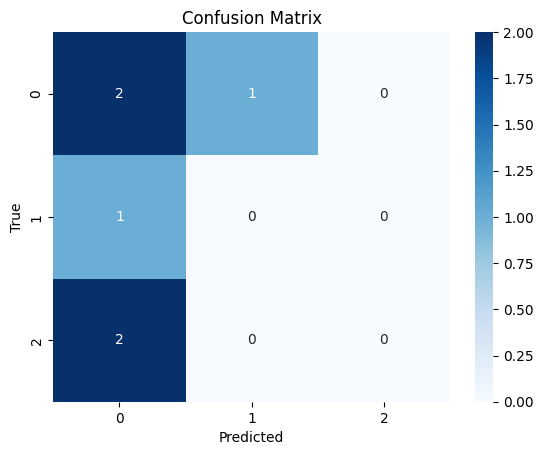

Baseline Accuracy (majority class): 0.50
Model Accuracy: 0.33


In [271]:
# CODE_CELL11
#Evaluate the Classifier’s Performance
evaluate_classifier(y_test, y_pred)

confusion_matrix_plot(y_test, y_pred)

baseline_accuracy(y_test, y_pred)

In [272]:
# CODE_CELL12
import pandas as pd
import numpy as np

# Simulated patient data
np.random.seed(123)
n_patients = 1500

patient_data = {
    'age': np.random.randint(18, 95, n_patients),
    'length_of_stay': np.random.randint(1, 30, n_patients),
    'num_medications': np.random.randint(1, 25, n_patients),
    'num_diagnoses': np.random.randint(1, 16, n_patients),
    'admission_type': np.random.choice(['Emergency', 'Urgent', 'Elective'], n_patients),
    'discharge_disposition': np.random.choice(['Home', 'Transfer', 'AMA'], n_patients, p=[0.7, 0.25, 0.05]),
    'previous_admissions': np.random.poisson(2, n_patients),
    'diabetic': np.random.choice(['Yes', 'No'], n_patients, p=[0.3, 0.7]),
    'readmitted': np.random.choice([0, 1], n_patients, p=[0.65, 0.35])
}

# Introduce missing values and outliers
patient_df = pd.DataFrame(patient_data)
missing_indices = np.random.choice(n_patients, int(0.1 * n_patients), replace=False)
patient_df.loc[missing_indices[:len(missing_indices)//2], 'num_medications'] = np.nan
patient_df.loc[missing_indices[len(missing_indices)//2:], 'length_of_stay'] = np.nan

patient_df.to_csv("patient_data.csv", index=False)

MARKDOWN_CELL09
```
import seaborn as sns
import matplotlib.pyplot as plt

def explore_dataset(df, step="summary"):
    """Helper for exploratory data analysis with multiple options."""
    if step == "summary":
        print("=== Dataset Summary ===")
        print(df.describe(include="all"))
    elif step == "distributions":
        df.hist(figsize=(12, 8))
        plt.suptitle("Feature Distributions")
        plt.show()
    elif step == "correlations":
        corr = df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    elif step == "target_balance":
        sns.countplot(x="readmitted", data=df)
        plt.title("Target Variable Balance")
        plt.show()
    else:
        print("Step not recognised. Options: 'summary', 'distributions', 'correlations', 'target_balance'")


def handle_missing_values(df, strategy="mean", column=None):
    """
    Handle missing values with different strategies:
    - 'mean' / 'median' / 'mode' for imputation
    - 'drop' to remove missing rows
    """
    if column is None:
        print("Please specify a column.")
        return df
    
    if strategy == "mean":
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == "median":
        df[column].fillna(df[column].median(), inplace=True)
    elif strategy == "mode":
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif strategy == "drop":
        df.dropna(subset=[column], inplace=True)
    else:
        print("Unknown strategy. Options: 'mean', 'median', 'mode', 'drop'")
    
    return df


def detect_outliers_iqr(df, column):
    """Detect outliers in a numerical column using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5*IQR))]
    print(f"Found {len(outliers)} outliers in {column}")
    return outliers

def treat_outliers(df, column, method="cap"):
    """
    Treat outliers in a numerical column.
    - 'cap' : Cap values at 5th and 95th percentiles
    - 'remove' : Remove rows with outliers
    """
    if method == "cap":
        lower = df[column].quantile(0.05)
        upper = df[column].quantile(0.95)
        df[column] = np.where(df[column] < lower, lower, df[column])
        df[column] = np.where(df[column] > upper, upper, df[column])
    elif method == "remove":
        outliers = detect_outliers_iqr(df, column)
        df = df.drop(outliers.index)
    else:
        print("Unknown method. Options: 'cap', 'remove'")
    return df


def document_data_issues(df):
    """Check dataset for quality issues and print findings."""
    issues = {}
    
    # Missing values
    missing = df.isnull().sum()
    issues["missing_values"] = missing[missing > 0].to_dict()
    
    # Duplicates
    issues["duplicates"] = df.duplicated().sum()
    
    # Data types
    issues["data_types"] = df.dtypes.to_dict()
    
    print("=== Data Quality Report ===")
    for k, v in issues.items():
        print(f"{k}: {v}")
    return issues
```

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

def explore_dataset(df, step):
    """Helper for exploratory data analysis with multiple options."""
    if step == "summary":
        print("=== Dataset Summary ===")
        print(df.describe(include="all"))
    elif step == "distributions":
        df.hist(figsize=(12, 8))
        plt.suptitle("Feature Distributions")
        plt.show()
    elif step == "correlations":
        corr = df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    elif step == "target_balance":
        sns.countplot(x="readmitted", data=df)
        plt.title("Target Variable Balance")
        plt.show()
    else:
        print("Step not recognised. Options: 'summary', 'distributions', 'correlations', 'target_balance'")


def handle_missing_values(df, strategy, column):
    """
    Handle missing values with different strategies:
    - 'mean' / 'median' / 'mode' for imputation
    - 'drop' to remove missing rows
    """
    if column is None:
        print("Please specify a column.")
        return df
    
    if strategy == "mean":
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == "median":
        df[column].fillna(df[column].median(), inplace=True)
    elif strategy == "mode":
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif strategy == "drop":
        df.dropna(subset=[column], inplace=True)
    else:
        print("Unknown strategy. Options: 'mean', 'median', 'mode', 'drop'")
    
    return df


def detect_outliers_iqr(df, column):
    """Detect outliers in a numerical column using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5*IQR))]
    print(f"Found {len(outliers)} outliers in {column}")
    return outliers

def treat_outliers(df, column, method="cap"):
    """
    Treat outliers in a numerical column.
    - 'cap' : Cap values at 5th and 95th percentiles
    - 'remove' : Remove rows with outliers
    """
    if method == "cap":
        lower = df[column].quantile(0.05)
        upper = df[column].quantile(0.95)
        df[column] = np.where(df[column] < lower, lower, df[column])
        df[column] = np.where(df[column] > upper, upper, df[column])
    elif method == "remove":
        outliers = detect_outliers_iqr(df, column)
        df = df.drop(outliers.index)
    else:
        print("Unknown method. Options: 'cap', 'remove'")
    return df


def document_data_issues(df):
    """Check dataset for quality issues and print findings."""
    issues = {}
    
    # Missing values
    missing = df.isnull().sum()
    issues["missing_values"] = missing[missing > 0].to_dict()
    
    # Duplicates
    issues["duplicates"] = df.duplicated().sum()
    
    # Data types
    issues["data_types"] = df.dtypes.to_dict()
    
    print("=== Data Quality Report ===")
    for k, v in issues.items():
        print(f"{k}: {v}")
    return issues

=== Dataset Summary ===
                age  length_of_stay  num_medications  num_diagnoses  \
count   1500.000000     1425.000000      1425.000000    1500.000000   
unique          NaN             NaN              NaN            NaN   
top             NaN             NaN              NaN            NaN   
freq            NaN             NaN              NaN            NaN   
mean      54.782000       15.127719        12.641404       7.981333   
std       22.042135        8.341161         6.818872       4.273308   
min       18.000000        1.000000         1.000000       1.000000   
25%       36.000000        8.000000         7.000000       4.000000   
50%       54.000000       15.000000        12.000000       8.000000   
75%       74.000000       23.000000        19.000000      12.000000   
max       94.000000       29.000000        24.000000      15.000000   

       admission_type discharge_disposition  previous_admissions diabetic  \
count            1500                  1500   

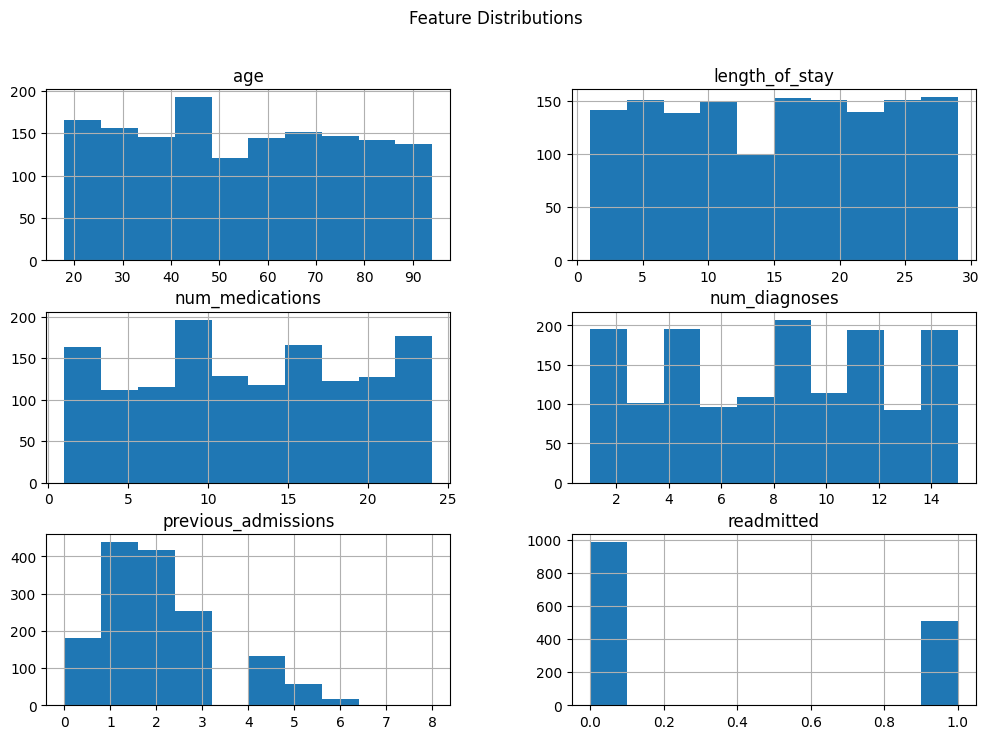

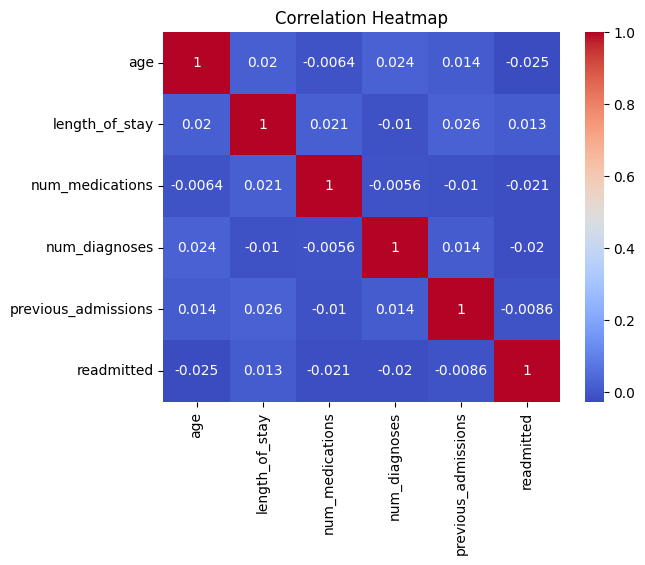

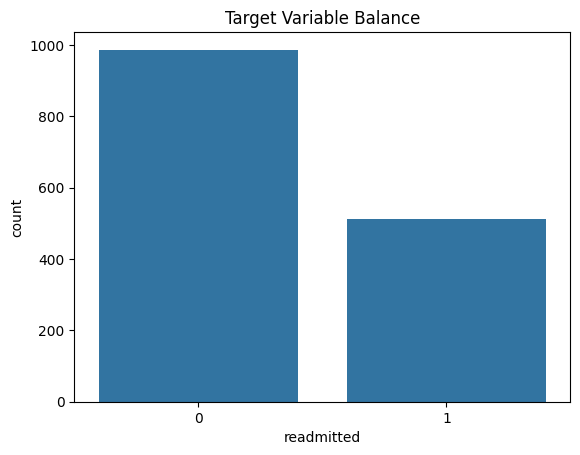

In [274]:
# CODE_CELL13

df = pd.read_csv("patient_data.csv")


explore_dataset(df, step="summary")

explore_dataset(df, step="distributions")


explore_dataset(df, step="correlations")

explore_dataset(df, step="target_balance")

In [275]:
# CODE_CELL14

# Check missing values before
print("Before handling missing values:")
print(df.isnull().sum())

# Handle missing values
df = handle_missing_values(df, strategy="median", column="length_of_stay")
df = handle_missing_values(df, strategy="mean", column="num_medications")

# Verify data is fixed..
print("\nAfter handling missing values:")
print(df.isnull().sum())

Before handling missing values:
age                       0
length_of_stay           75
num_medications          75
num_diagnoses             0
admission_type            0
discharge_disposition     0
previous_admissions       0
diabetic                  0
readmitted                0
dtype: int64

After handling missing values:
age                      0
length_of_stay           0
num_medications          0
num_diagnoses            0
admission_type           0
discharge_disposition    0
previous_admissions      0
diabetic                 0
readmitted               0
dtype: int64


/var/folders/c9/zcm8ktc57tl4cds3b02qzd300000gn/T/ipykernel_24183/436575226.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/var/folders/c9/zcm8ktc57tl4cds3b02qzd300000gn/T/ipykernel_24183/436575226.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

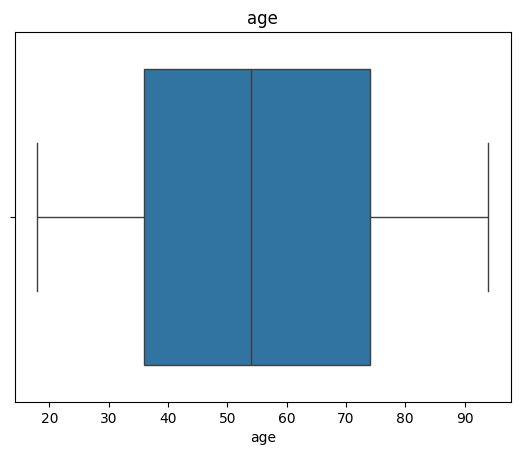

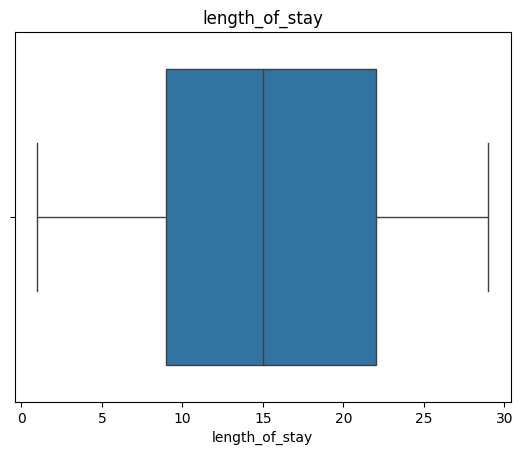

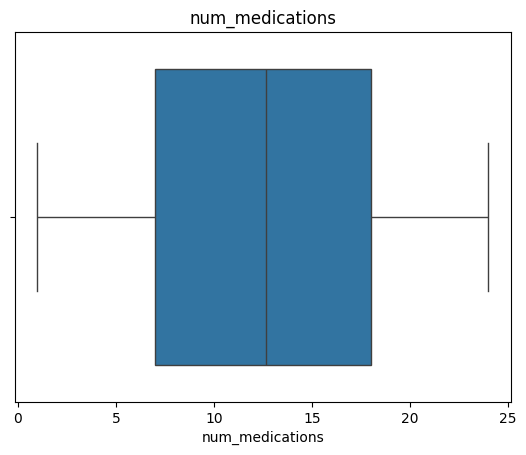

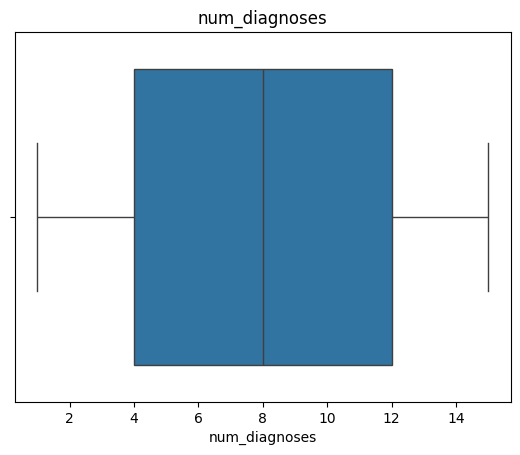

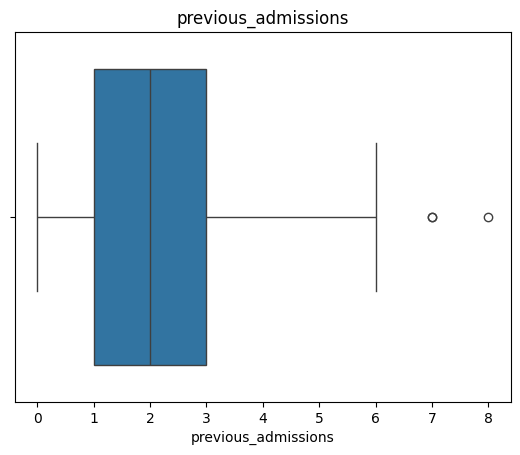

Found 0 outliers in age
Found 0 outliers in length_of_stay
Found 0 outliers in num_medications
Found 0 outliers in num_diagnoses
Found 3 outliers in previous_admissions


In [276]:
# CODE_CELL15

# === Outlier Detection ===

numeric_columns = ['age', 'length_of_stay', 'num_medications', 'num_diagnoses', 'previous_admissions']
#in visual way 
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)

# === Outlier Treatment ===
df = treat_outliers(df, 'previous_admissions', method='cap')

In [277]:
# CODE_CELL16

document_data_issues(df)

=== Data Quality Report ===
missing_values: {}
duplicates: 0
data_types: {'age': dtype('int64'), 'length_of_stay': dtype('float64'), 'num_medications': dtype('float64'), 'num_diagnoses': dtype('int64'), 'admission_type': dtype('O'), 'discharge_disposition': dtype('O'), 'previous_admissions': dtype('float64'), 'diabetic': dtype('O'), 'readmitted': dtype('int64')}


{'missing_values': {},
 'duplicates': 0,
 'data_types': {'age': dtype('int64'),
  'length_of_stay': dtype('float64'),
  'num_medications': dtype('float64'),
  'num_diagnoses': dtype('int64'),
  'admission_type': dtype('O'),
  'discharge_disposition': dtype('O'),
  'previous_admissions': dtype('float64'),
  'diabetic': dtype('O'),
  'readmitted': dtype('int64')}}

MARKDOWN_CELL10

```
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# ---------- Model Training ----------
def train_model(X, y, model="logistic"):
    """
    Train a model based on choice:
    - 'logistic' : Logistic Regression
    - 'random_forest' : Random Forest
    - 'svm' : Support Vector Machine
    """
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    return clf, X_test, y_test, y_pred, y_proba

# ---------- Model Evaluation ----------
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model using precision, recall, F1-score, and ROC-AUC."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))
    
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC Score: {auc:.3f}")
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

# ---------- Model Comparison ----------
def compare_models(X, y, models=["logistic", "random_forest", "svm"]):
    """Train multiple models and compare performance."""
    results = {}
    for m in models:
        print(f"\nTraining {m}...")
        clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model=m)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        results[m] = {
            "precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
            "recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
            "f1": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
            "roc_auc": auc
        }
    return pd.DataFrame(results).T

# ---------- Cross-Validation ----------
def cross_validate_model(X, y, model="logistic", folds=5):
    """Perform k-fold cross-validation and report average accuracy."""
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
    return scores

```


In [278]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Model Training
def train_model(X, y, model="logistic"):
    """
    Train a model based on choice:
    - 'logistic' : Logistic Regression
    - 'random_forest' : Random Forest
    - 'svm' : Support Vector Machine
    """
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    return clf, X_test, y_test, y_pred, y_proba

# Model Evaluation
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model using precision, recall, F1-score, and ROC-AUC."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))
    
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC Score: {auc:.3f}")
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

# Model Comparison
def compare_models(X, y, models=["logistic", "random_forest", "svm"]):
    """Train multiple models and compare performance."""
    results = {}
    for m in models:
        print(f"\nTraining {m}...")
        clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model=m)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        results[m] = {
            "precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
            "recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
            "f1": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
            "roc_auc": auc
        }
    return pd.DataFrame(results).T

# Cross-Validation 
def cross_validate_model(X, y, model="logistic", folds=5):
    """Perform k-fold cross-validation and report average accuracy."""
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
    return scores

In [279]:
# CODE_CELL17

# Separate features and target
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

# Convert categorical columns to numeric
X = pd.get_dummies(X, columns=["admission_type", "discharge_disposition", "diabetic"], drop_first=True)

# Train and evaluate a Random Forest model

# Logistic Regression
clf_log, X_test_log, y_test_log, y_pred_log, y_proba_log = train_model(X, y, model="logistic")

# Support Vector Machine
clf_svm, X_test_svm, y_test_svm, y_pred_svm, y_proba_svm = train_model(X, y, model="svm")

# Random Forest
clf_rf, X_test_rf, y_test_rf, y_pred_rf, y_proba_rf = train_model(X, y, model="random_forest")



Logistic Regression
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       296
           1       0.00      0.00      0.00       154

    accuracy                           0.66       450
   macro avg       0.33      0.50      0.40       450
weighted avg       0.43      0.66      0.52       450

ROC-AUC Score: 0.463


/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

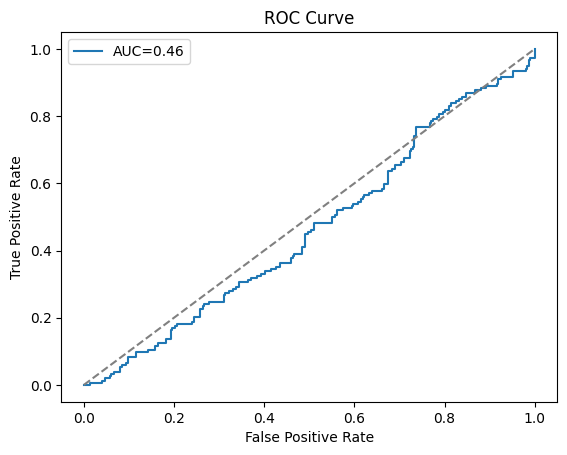

Random Forest
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       296
           1       0.26      0.08      0.12       154

    accuracy                           0.61       450
   macro avg       0.45      0.48      0.43       450
weighted avg       0.52      0.61      0.53       450

ROC-AUC Score: 0.453


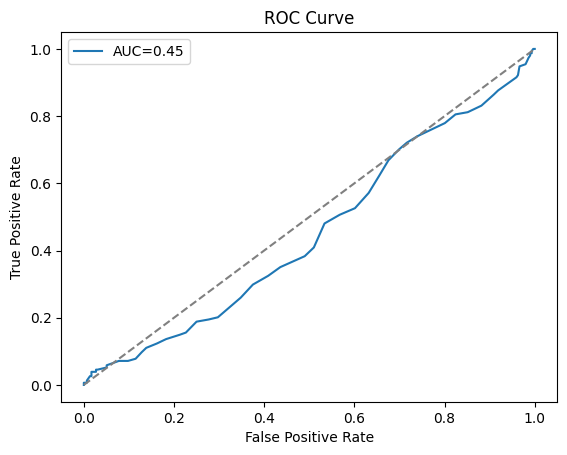

Support Vector Machine
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       296
           1       0.00      0.00      0.00       154

    accuracy                           0.66       450
   macro avg       0.33      0.50      0.40       450
weighted avg       0.43      0.66      0.52       450

ROC-AUC Score: 0.553


/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

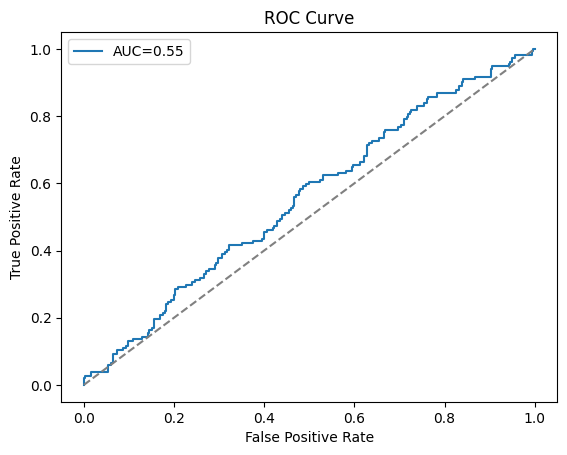

Model Comparison Summary

Training logistic...

Training random_forest...


/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Training svm...
               precision    recall       f1   roc_auc
logistic        0.432672  0.657778  0.52199  0.463255
random_forest   0.515854  0.608889  0.53346  0.453163
svm             0.432672  0.657778  0.52199  0.552804


/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/intelligent_systems_exam_group_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [280]:
# CODE_CELL18

#Logistic Regression
print("Logistic Regression")
evaluate_model(y_test_log, y_pred_log, y_proba_log)

#Random Forest
print("Random Forest")
evaluate_model(y_test_rf, y_pred_rf, y_proba_rf)

#SVM
print("Support Vector Machine")
evaluate_model(y_test_svm, y_pred_svm, y_proba_svm)

# Compare  Models all in one
print("Model Comparison Summary")
results = compare_models(X, y, models=["logistic", "random_forest", "svm"])
print(results)


In [281]:
# CODE_CELL19

print("Cross-Validation")

print("\nLogistic Regression\n")
scores_log = cross_validate_model(X, y, model="logistic", folds=5)

print("\nRandom Forest\n")
scores_rf = cross_validate_model(X, y, model="random_forest", folds=5)

print("\nSupport Vector Machine\n")
scores_svm = cross_validate_model(X, y, model="svm", folds=5)

# Summarize
cv_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Mean Accuracy": [
        scores_log.mean(),
    scores_rf.mean(),
        scores_svm.mean()
    ],
    "Std Dev": [
        scores_log.std(),
     scores_rf.std(),
           scores_svm.std()
    ]
})

print("\nSummary")
print(cv_results)

"""
Cross-validation is like testing a model many times to see if it really learns. If it is good on 
some tests but bad on others, it is overfitting  it memorized too much. If it is bad on all tests,
it is underfitting  it didn’t learn enough. Some models like Logistic Regression are simple, Random
Forest is strong but can overfit, and SVM needs careful settings. Cross-validation helps us pick a
model that is just right and works well on new data.
"""


Cross-Validation

Logistic Regression

Cross-validation scores: [0.66       0.66       0.65666667 0.65666667 0.65666667]
Mean accuracy: 0.658 (+/- 0.002)

Random Forest

Cross-validation scores: [0.62333333 0.60333333 0.63333333 0.61333333 0.63      ]
Mean accuracy: 0.621 (+/- 0.011)

Support Vector Machine

Cross-validation scores: [0.66       0.66       0.65666667 0.65666667 0.65666667]
Mean accuracy: 0.658 (+/- 0.002)

Summary
                 Model  Mean Accuracy   Std Dev
0  Logistic Regression       0.658000  0.001633
1        Random Forest       0.620667  0.011035
2                  SVM       0.658000  0.001633


'\nCross-validation is like testing a model many times to see if it really learns. If it is good on \nsome tests but bad on others, it is overfitting  it memorized too much. If it is bad on all tests,\nit is underfitting  it didn’t learn enough. Some models like Logistic Regression are simple, Random\nForest is strong but can overfit, and SVM needs careful settings. Cross-validation helps us pick a\nmodel that is just right and works well on new data.\n'

MARKDOWN_CELL11

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Inspect Model Features ----------
def inspect_model_features(model, feature_names):
    """
    Inspect model features:
    - For Logistic Regression: show coefficients
    - For Random Forest: show feature importances
    - For SVM: not directly interpretable (warn the student)
    """
    if hasattr(model, "coef_"):
        coefs = pd.Series(model.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
        print("Top coefficients (Logistic Regression):")
        print(coefs.head(10))
        coefs.head(10).plot(kind="barh", title="Top Logistic Coefficients")
        plt.show()
    elif hasattr(model, "feature_importances_"):
        imps = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("Top feature importances (Random Forest):")
        print(imps.head(10))
        imps.head(10).plot(kind="barh", title="Top Random Forest Features")
        plt.show()
    else:
        print("This model does not provide direct feature importance (e.g., SVM with kernel).")

# ---------- Error Analysis ----------
def error_analysis(y_true, y_pred, X_test=None):
    """
    Inspect misclassified cases for deeper evaluation.
    """
    errors = np.where(y_true != y_pred)[0]
    print(f"Number of misclassified cases: {len(errors)}")
    if X_test is not None:
        print("Example misclassified rows:")
        display(pd.DataFrame(X_test).iloc[errors[:5]])  # show first 5 errors

# ---------- Risk & Bias Check Stub ----------
def check_risk_bias(df, sensitive_column, predictions):
    """
    Simple bias check: compare prediction rates across groups.
    Useful for healthcare fairness evaluation.
    """
    df_copy = df.copy()
    df_copy["prediction"] = predictions
    rates = df_copy.groupby(sensitive_column)["prediction"].mean()
    print(f"Prediction rates by {sensitive_column}:")
    print(rates)
    return rates
```

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Inspect Model Features ----------
def inspect_model_features(model, feature_names):
    """
    Inspect model features:
    - For Logistic Regression: show coefficients
    - For Random Forest: show feature importances
    - For SVM: not directly interpretable (warn the student)
    """
    if hasattr(model, "coef_"):
        coefs = pd.Series(model.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
        print("Top coefficients (Logistic Regression):")
        print(coefs.head(10))
        coefs.head(10).plot(kind="barh", title="Top Logistic Coefficients")
        plt.show()
    elif hasattr(model, "feature_importances_"):
        imps = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("Top feature importances (Random Forest):")
        print(imps.head(10))
        imps.head(10).plot(kind="barh", title="Top Random Forest Features")
        plt.show()
    else:
        print("This model does not provide direct feature importance (e.g., SVM with kernel).")

# ---------- Error Analysis ----------
def error_analysis(y_true, y_pred, X_test=None):
    """
    Inspect misclassified cases for deeper evaluation.
    """
    errors = np.where(y_true != y_pred)[0]
    print(f"Number of misclassified cases: {len(errors)}")
    if X_test is not None:
        print("Example misclassified rows:")
        display(pd.DataFrame(X_test).iloc[errors[:5]])  # show first 5 errors

# ---------- Risk & Bias Check Stub ----------
def check_risk_bias(df, sensitive_column, predictions):
    """
    Simple bias check: compare prediction rates across groups.
    Useful for healthcare fairness evaluation.
    """
    df_copy = df.copy()
    df_copy["prediction"] = predictions
    rates = df_copy.groupby(sensitive_column)["prediction"].mean()
    print(f"Prediction rates by {sensitive_column}:")
    print(rates)
    return rates

Top feature importances (Random Forest):
age                               0.231108
length_of_stay                    0.191526
num_medications                   0.185917
num_diagnoses                     0.162068
previous_admissions               0.099729
diabetic_Yes                      0.029542
admission_type_Urgent             0.028471
admission_type_Emergency          0.027258
discharge_disposition_Home        0.024788
discharge_disposition_Transfer    0.019593
dtype: float64


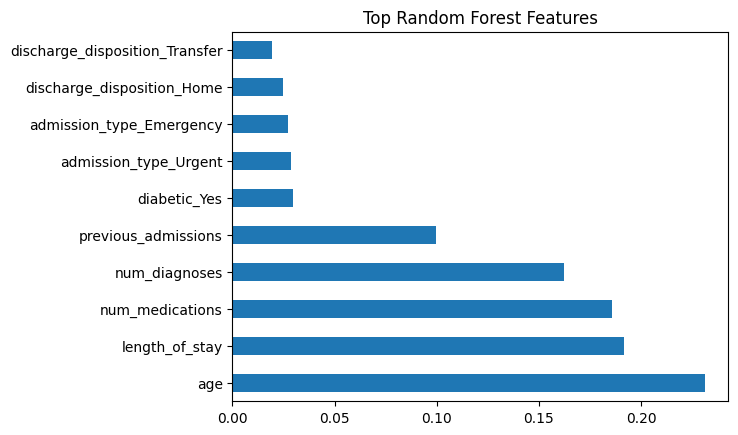

Number of misclassified cases: 176
Example misclassified rows:


,age,length_of_stay,num_medications,num_diagnoses,previous_admissions,admission_type_Emergency,admission_type_Urgent,discharge_disposition_Home,discharge_disposition_Transfer,diabetic_Yes
187,43,13.0,16.0,13,0.0,False,False,True,False,False
262,89,20.0,23.0,4,1.0,False,False,False,True,True
1451,31,15.0,8.0,9,1.0,True,False,True,False,True
946,31,19.0,22.0,2,1.0,False,True,True,False,True
842,47,10.0,17.0,6,3.0,True,False,True,False,False


Prediction rates by diabetic:
diabetic
No     0.291506
Yes    0.221983
Name: prediction, dtype: float64


'Random Forest is the best model. It can understand things like age, past visits, \nand diabetes. Logistic Regression is simpler and SVM is harder to use.\nRandom Forest works well on new patients and shows which things are most important. \nThis helps doctors and nurses understand and make better decisions.'

In [283]:
# CODE_CELL20

#Inspect top features for Random Forest
inspect_model_features(clf_rf, X.columns)

#Error analysis for Random Forest
error_analysis(y_test_rf, y_pred_rf, X_test_rf)

#Check bias based on diabetic (sensitive column)
check_risk_bias(df, sensitive_column="diabetic", predictions=clf_rf.predict(X))

#Model Selection Justification
"""Random Forest is the best model. It can understand things like age, past visits, 
and diabetes. Logistic Regression is simpler and SVM is harder to use.
Random Forest works well on new patients and shows which things are most important. 
This helps doctors and nurses understand and make better decisions."""

MARKDOWN_CELL12

Machine learning is a computer tool that helps doctors make decisions. It can look at lots of patient data and find patterns faster than humans. But it is not perfect and can make mistakes. If the data is missing, wrong, or only from some types of patients, the model can give wrong answers. This can be unfair to some people.

Some models are very complicated, so even doctors may not understand why they made a prediction. This can make it hard to trust the results. Sometimes, the model learns too much from old data, which is called overfitting. Then it may work well on old patients but fail on new ones.

Patient privacy is also important. The computer needs to keep data safe so no one can see it who shouldn’t. Most importantly, the model should help doctors, not replace them. Humans are still needed to check the results and make safe decisions. Machine learning is a helpful tool, but doctors must always be in charge to keep patients safe and healthy.


MARKDOWN_CELL13

```
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Helper function with intentional bugs - DEBUG THIS
def create_disease_prediction_model(input_shape, num_classes):
    """
    Creates a neural network for disease progression prediction
    BUG ALERT: This function contains 3-4 deliberate errors that affect model performance
    """
    model = keras.Sequential([
        keras.layers.Dense(128, activation='sigmoid', input_shape=(input_shape,)),  # Bug 1: Wrong activation for hidden layer
        keras.layers.Dropout(0.8),  # Bug 2: Dropout rate too high
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='relu')  # Bug 3: Wrong activation for multi-class output
    ])
    
    # Bug 4: Wrong optimizer and loss function for the task
    model.compile(optimizer='sgd',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    return model

# Sample medical data (features: age, BMI, blood_pressure, cholesterol, etc.)
np.random.seed(42)
X_train = np.random.randn(1000, 8)  # 8 medical features
y_train = np.random.randint(0, 3, 1000)  # 3 disease progression stages
X_test = np.random.randn(200, 8)
y_test = np.random.randint(0, 3, 200)
```

#MARKDOWN_CELL13

1 Hidden Layer Activation
-  `keras.layers.Dense(128, activation='sigmoid', input_shape=(input_shape,))`  
-  `keras.layers.Dense(128, activation='relu', input_shape=(input_shape,))`

2 Dropout Rate  
-  `keras.layers.Dropout(0.8)`  
-  `keras.layers.Dropout(0.2)`

3 Output Layer Activation  
-  `keras.layers.Dense(num_classes, activation='relu')`  
-  `keras.layers.Dense(num_classes, activation='softmax')`

4 Optimizer and Loss Function  
-  `model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])`  
-  `model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`


In [284]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Helper function - Dbuged
def create_disease_prediction_model(input_shape, num_classes):
    """
    Creates a neural network for disease progression prediction
    - Fixed activation functions
    - Adjusted dropout rate
    - Correct loss and optimizer for multi-class classification
    """
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),  #bu 1  relu instead of sigmoid
        keras.layers.Dropout(0.2),  #bu 2  0.2 instead of 0.8
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')  #bu 3  softmax instead of relu
    ])
    
    #bu 4  Adam optimizer + sparse categorical 
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Sample medical data (features: age, BMI, blood_pressure, cholesterol, etc.)
np.random.seed(42)
X_train = np.random.randn(1000, 8)  # 8 medical features
y_train = np.random.randint(0, 3, 1000)  # 3 disease progression stages
X_test = np.random.randn(200, 8)
y_test = np.random.randint(0, 3, 200)


MARKDOWN_CELL15

- 1. Hidden Layer Activation
Sigmoid makes learning slow. The model forgets patterns and cannot understand important patient information.

- 2. Dropout Rate Too High
Dropping 80% of neurons is too much. The model cannot learn and may give wrong results.

- 3. Output Layer Activation
ReLU at the end gives wrong answers. The model cannot tell which disease stage a patient has.

- 4. Optimizer and Loss Function
SGD and mean squared error are bad for this task. The model trains slowly and predicts incorrectly.

MARKDOWN_CELL16
```
def analyse_model_predictions(model, X_test, y_test):
    """
    Analyses model predictions and provides interpretation tools
    You need to complete this function
    """
    predictions = model.predict(X_test)
    
    # Your task: Complete this function to return:
    # - Prediction probabilities
    # - Confidence scores
    # - Feature importance analysis (if possible)
    
    return {
        'predictions': None,  # Complete this
        'confidence_scores': None,  # Complete this
        'analysis_summary': None  # Complete this
    }
```    

In [285]:
# CODE_CELL22

def analyse_preds(model, X, y, feat=None):
    """
    Simple analysis of model predictions
    Returns predicted classes, confidence, and top features
    """
    # Predictions
    pred = model.predict(X)
    

    conf = model.predict_proba(X).max(axis=1) if hasattr(model, "predict_proba") else None
    

    top_feat = None
    if hasattr(model, "feature_importances_") and feat is not None:
        top_feat = pd.Series(model.feature_importances_, index=feat).sort_values(ascending=False).head(10)
    elif hasattr(model, "coef_") and feat is not None:
        top_feat = pd.Series(model.coef_[0], index=feat).sort_values(key=abs, ascending=False).head(10)
    
    return {
        'pred': pred,
        'conf': conf,
        'top_feat': top_feat
    }

# Example  Random Forest
res_rf = analyse_preds(clf_rf, X_test_rf, y_test_rf, feat=X.columns)
print("Pred:", res_rf['pred'][:5])
print("Conf:", res_rf['conf'][:5])
print("Top Features:\n", res_rf['top_feat'])


Pred: [0 0 0 0 0]
Conf: [0.63 0.7  0.81 0.57 0.71]
Top Features:
 age                               0.231108
length_of_stay                    0.191526
num_medications                   0.185917
num_diagnoses                     0.162068
previous_admissions               0.099729
diabetic_Yes                      0.029542
admission_type_Urgent             0.028471
admission_type_Emergency          0.027258
discharge_disposition_Home        0.024788
discharge_disposition_Transfer    0.019593
dtype: float64


MARKDOWN_CELL17

The model tries to guess things about patients, like if they might come back to the hospital. It tells us its guess and how sure it is. For example, Predition [0 0 0 0 0] shows the guesses, and Confident [0.63 0.7 0.81 0.57 0.71] shows how sure the model is. A big number like 0.81 means the model is very sure. A smaller number like 0.57 means the model is not very sure.

When the model is not sure, it might mean the patient’s information is unusual or hard to understand. Maybe the patient has many medicines, different diseases, or strange patterns in their data. Doctors need to look carefully at these patients and check more tests. The model helps them see which patients need more attention.

The model also tells us which things about the patient are most important for its guess. In this case, age, length of stay, and number of medicines are very important. Other things like diabetes or admission type are also used. By looking at these important features and the confidence, doctors can make better decisions and help patients get the right care.

MARKDOWN_CELL18

To explain the model to doctors who are not AI experts, we use simple words and pictures. First, we show what the model predicts for each patient, like if they might come back to the hospital. Then, we show how sure the model is. A high number means the model is very sure, and a low number means it is not sure and the patient needs more checking.

 we show which things about the patient are most important for the prediction. For example, age, how long they stayed in the hospital, how many medicines they take, and past admissions. We can use charts or bars to make this easy to see.

 we tell doctors that the model is there to help them, not replace them. It shows which patients may need more care and helps doctors make safer, better decisions.

MARKDOWN_CELL19

AI Agent System Architecture and Decision-Making

The AI agent would have several parts. First, it collects patient data, like age, medical history, test results, and symptoms. Then, it uses a machine learning model to predict possible diagnoses. The agent also calculates a confidence score for each prediction. If the confidence is high, it can generate a preliminary report. If the confidence is low, it suggests additional tests to get more information.

The agent continuously learns from doctor feedback. If doctors correct its predictions, the agent updates its model to improve future accuracy. It also uses important patient features to explain why it made a certain prediction, helping doctors understand.

The agent reasons about uncertainty by checking confidence scores. Low confidence triggers careful actions, like suggesting more tests or flagging cases for doctor review. This way, the AI supports doctors safely while helping patients get better care.

MARKDOWN_CELL20

Risks of Generative AI 

Generative AI can make mistakes when writing medical reports. It might give wrong information, leave out important details, or suggest treatments that are unsafe. It could also accidentally share private patient information if not carefully managed.

To prevent these risks, the AI should always be supervised by doctors. Every report should be reviewed before being used. The system should also have rules to check for errors, like validating numbers, test results, and treatments. Privacy safeguards must protect patient data with encryption and secure storage.

Another safeguard is using confidence scores. If the AI is unsure, it should flag the report for review rather than making decisions alone. Logs should track all AI suggestions and doctor feedback so the system improves safely over time. These measures help make generative AI safer and more reliable in healthcare.

MARKDOWN_CELL21

Sometimes the AI sees patient data that is very different from what it learned before. This could happen with rare diseases, unusual test results, or new treatments. The AI might make wrong predictions if it tries to guess without understanding.

To handle this, the AI uses confidence scores. Low confidence tells the system to ask for more information or alert a doctor. The AI can suggest extra tests or monitoring instead of giving a definite answer. Doctors review these cases and provide feedback, which helps the AI learn over time.

The system can also use similarity checks. It compares the new patient to similar past patients to see if predictions are reliable. By combining confidence, extra tests, and doctor feedback, the AI handles unusual cases safely while learning and improving its predictions for the future.